# Team_Wine_Project

## Data Preperation 

### Imports 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sb

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import re #regex package

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read the data
wine_df1 = pd.read_csv ("winemag-data_first150k.csv")
wine_df2 = pd.read_csv ("winemag-data-130k-v2.csv")

In [3]:
# Convert the datasets to a dataframe
wine_rev = pd.DataFrame()
wine_rev = pd.concat([wine_df1,wine_df2])

In [4]:
# Use describe function to display primary statistics
wine_rev.describe()

,Unnamed: 0,points,price
count,280901.000000,280901.000000,258210.000000
mean,70615.705960,88.146934,34.177162
std,41214.379445,3.151528,38.611708
min,0.000000,80.000000,4.000000
25%,35112.000000,86.000000,16.000000
50%,70225.000000,88.000000,25.000000
75%,105337.000000,90.000000,40.000000
max,150929.000000,100.000000,3300.000000


In [5]:
# Use info function to understand the type of features we have
wine_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               280901 non-null int64
country                  280833 non-null object
description              280901 non-null object
designation              197701 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null object
region_1                 234594 non-null object
region_2                 111464 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  280900 non-null object
winery                   280901 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 32.1+ MB


In [6]:
wine_rev.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


In [7]:
# insert codes into to the relevant variables that are object type and convert them from object to categorical
wine_rev["country"] = pd.Categorical(wine_rev["country"])
wine_rev["province"] = pd.Categorical(wine_rev["province"])
wine_rev["region_1"] = pd.Categorical(wine_rev["region_1"])
wine_rev["region_2"] = pd.Categorical(wine_rev["region_2"])
wine_rev["taster_name"] = pd.Categorical(wine_rev["taster_name"])
wine_rev["variety"] = pd.Categorical(wine_rev["variety"])
wine_rev["winery"] = pd.Categorical(wine_rev["winery"])
wine_rev ["country_code"] = wine_rev["country"].cat.codes
wine_rev ["province_code"] = wine_rev["province"].cat.codes
wine_rev ["region_1_code"] = wine_rev["region_1"].cat.codes
wine_rev ["region_2_code"] = wine_rev["region_2"].cat.codes
wine_rev ["taster_name_code"] = wine_rev["taster_name"].cat.codes
wine_rev ["variety_code"] = wine_rev["variety"].cat.codes
wine_rev ["winery_code"] = wine_rev["winery"].cat.codes

wine_rev.head(100)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,country_code,province_code,region_1_code,region_2_code,taster_name_code,variety_code,winery_code
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,...,NaN,Cabernet Sauvignon,Heitz,46,53,801,7,-1,84,9617
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,...,NaN,Tinta de Toro,Bodega Carmen Rodríguez,42,296,1156,-1,-1,655,1596
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,...,NaN,Sauvignon Blanc,Macauley,46,53,576,13,-1,553,11865
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,...,NaN,Pinot Noir,Ponzi,46,305,1318,17,-1,476,14377
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,...,NaN,Provence red blend,Domaine de la Bégude,16,340,71,-1,-1,499,7198
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,NaN,...,NaN,Tinta de Toro,Numanthia,42,296,1156,-1,-1,655,13332
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,NaN,...,NaN,Tinta de Toro,Maurodos,42,296,1156,-1,-1,655,12414
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,NaN,...,NaN,Tinta de Toro,Bodega Carmen Rodríguez,42,296,1156,-1,-1,655,1596
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,NaN,...,NaN,Pinot Noir,Bergström,46,305,225,17,-1,476,1367
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,NaN,...,NaN,Pinot Noir,Blue Farm,46,53,1080,13,-1,476,1556


In [8]:
wine_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 21 columns):
Unnamed: 0               280901 non-null int64
country                  280833 non-null category
description              280901 non-null object
designation              197701 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null category
region_1                 234594 non-null category
region_2                 111464 non-null category
taster_name              103727 non-null category
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  280900 non-null category
winery                   280901 non-null category
country_code             280901 non-null int8
province_code            280901 non-null int16
region_1_code            280901 non-null int16
region_2_code            280901 non-null int8
taster_name_code   

In [9]:
wine_rev.describe()

,Unnamed: 0,points,price,country_code,province_code,region_1_code,region_2_code,taster_name_code,variety_code,winery_code
count,280901.000000,280901.000000,258210.000000,280901.000000,280901.000000,280901.000000,280901.000000,280901.000000,280901.000000,280901.000000
mean,70615.705960,88.146934,34.177162,31.055482,205.935970,558.060925,2.029007,3.800446,377.341124,9982.731236
std,41214.379445,3.151528,38.611708,15.418664,161.132881,441.694724,5.050055,6.820019,214.265527,5546.655191
min,0.000000,80.000000,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,35112.000000,86.000000,16.000000,16.000000,53.000000,126.000000,-1.000000,-1.000000,132.000000,5597.000000
50%,70225.000000,88.000000,25.000000,35.000000,199.000000,549.000000,-1.000000,-1.000000,476.000000,10319.000000
75%,105337.000000,90.000000,40.000000,46.000000,340.000000,977.000000,3.000000,11.000000,529.000000,14783.000000
max,150929.000000,100.000000,3300.000000,49.000000,489.000000,1331.000000,17.000000,18.000000,755.000000,19185.000000


In [10]:
wine_rev.to_csv ("wine_rev.csv")

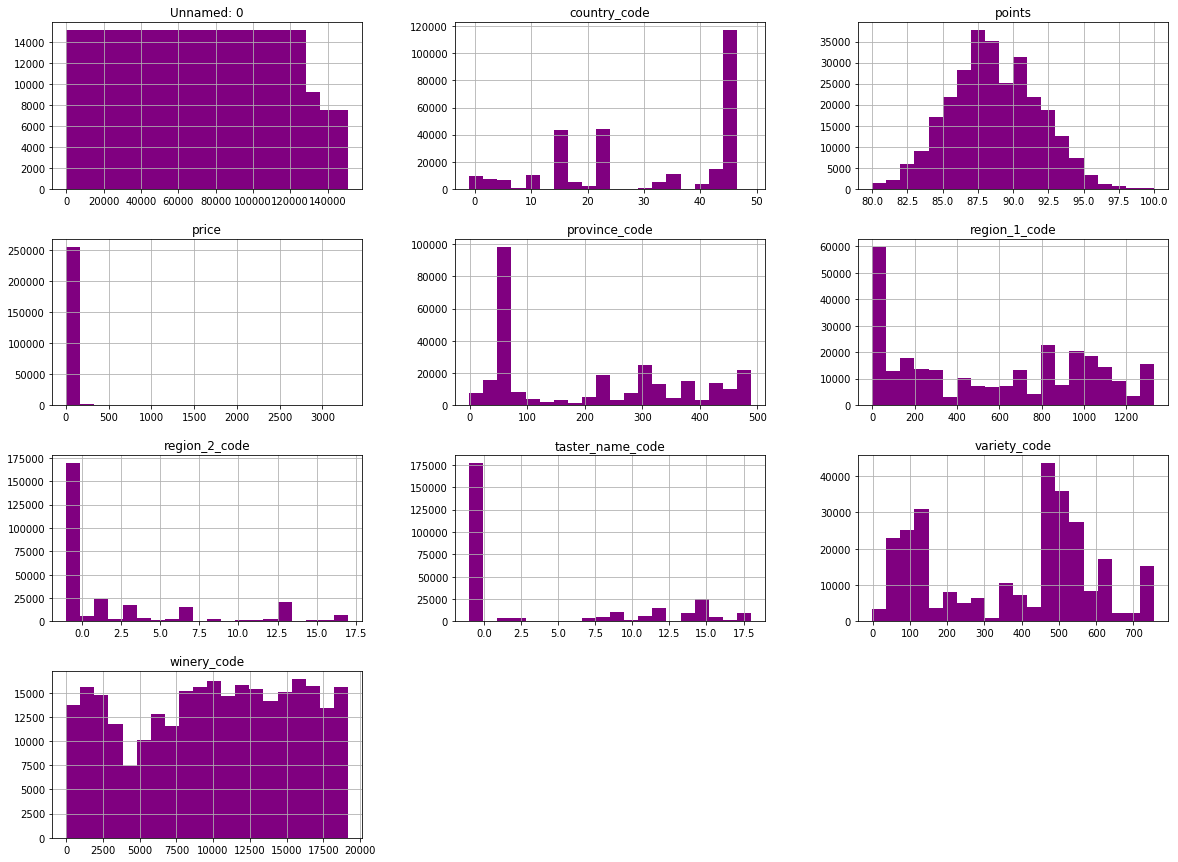

In [11]:
# Display the categorial variables as histograms
wine_rev.hist(bins = 20, figsize = (20,15), color ='purple') 
plt.show()

In [12]:
#drop the index ("unamed") column
wine_rev = wine_rev.drop('Unnamed: 0', axis =1)

In [13]:
wine_rev.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,country_code,province_code,region_1_code,region_2_code,taster_name_code,variety_code,winery_code
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz,46,53,801,7,-1,84,9617
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez,42,296,1156,-1,-1,655,1596
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley,46,53,576,13,-1,553,11865
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi,46,305,1318,17,-1,476,14377
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude,16,340,71,-1,-1,499,7198


### Missing values 

In [21]:
wine_rev.isnull().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
country_code                  0
province_code                 0
region_1_code                 0
region_2_code                 0
taster_name_code              0
variety_code                  0
winery_code                   0
dtype: int64

In [22]:
wine_rev.isna().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
country_code                  0
province_code                 0
region_1_code                 0
region_2_code                 0
taster_name_code              0
variety_code                  0
winery_code                   0
dtype: int64

In [23]:
#drop missing values from the dataset
wine_rev=wine_rev.dropna(axis=0, subset=['country'])
wine_rev=wine_rev.dropna(axis=0, subset=['variety'])
wine_rev=wine_rev.dropna(axis=0, subset=['designation'])
wine_rev=wine_rev.drop ('title', axis=1) #dropped due to many missing values and liitle information (duplicates the winery, etc.)
wine_rev=wine_rev.drop ('region_2', axis=1) #dropped due to many missing values and liitle information
wine_rev=wine_rev.dropna(axis=0, subset=['region_1'])
wine_rev=wine_rev.drop ('region_2_code', axis=1)

In [24]:
#fill in an important column the missing values with the mean of all the prices
wine_rev[['price']]=wine_rev[['price']].fillna(value = wine_rev['price'].mean())

In [25]:
wine_rev.isnull().sum()

country                       0
description                   0
designation                   0
points                        0
price                         0
province                      0
region_1                      0
taster_name              102902
taster_twitter_handle    104972
variety                       0
winery                        0
country_code                  0
province_code                 0
region_1_code                 0
taster_name_code              0
variety_code                  0
winery_code                   0
dtype: int64

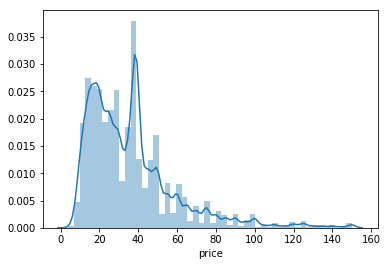

In [27]:
wine_rev_low = wine_rev[wine_rev['price']<=150]
sb.distplot(wine_rev_low['price'])

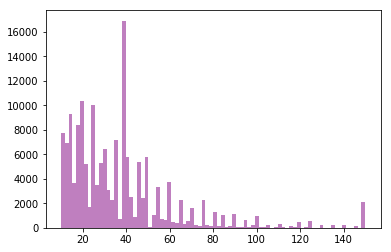

In [28]:
clip_price=np.clip(wine_rev['price'],10,150)
plt.hist(clip_price,bins=80, color='purple',alpha=0.5)
plt.show()

In [29]:
#to keep the reviewers names we splited the data into 2 - twitter that inckudes the reviewers and wine_rev that doesn't include
twitter=pd.DataFrame()
twitter = wine_rev #includes the reviewers
#drop missing values in twitter
twitter=twitter.dropna (subset=['taster_name'], axis=0)
twitter=twitter.dropna (subset=['taster_name_code'], axis=0)
twitter=twitter.dropna (subset=['taster_twitter_handle'], axis=0)

In [30]:
twitter.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
taster_name              0
taster_twitter_handle    0
variety                  0
winery                   0
country_code             0
province_code            0
region_1_code            0
taster_name_code         0
variety_code             0
winery_code              0
dtype: int64

In [31]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55678 entries, 0 to 129970
Data columns (total 17 columns):
country                  55678 non-null category
description              55678 non-null object
designation              55678 non-null object
points                   55678 non-null int64
price                    55678 non-null float64
province                 55678 non-null category
region_1                 55678 non-null category
taster_name              55678 non-null category
taster_twitter_handle    55678 non-null object
variety                  55678 non-null category
winery                   55678 non-null category
country_code             55678 non-null int8
province_code            55678 non-null int16
region_1_code            55678 non-null int16
taster_name_code         55678 non-null int8
variety_code             55678 non-null int16
winery_code              55678 non-null int16
dtypes: category(6), float64(1), int16(4), int64(1), int8(2), object(3)
memory usage: 4

In [32]:
# drop duplicate descriptions
twitter.drop_duplicates(subset=['description'],keep='first',inplace=True)

In [33]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51009 entries, 0 to 129970
Data columns (total 17 columns):
country                  51009 non-null category
description              51009 non-null object
designation              51009 non-null object
points                   51009 non-null int64
price                    51009 non-null float64
province                 51009 non-null category
region_1                 51009 non-null category
taster_name              51009 non-null category
taster_twitter_handle    51009 non-null object
variety                  51009 non-null category
winery                   51009 non-null category
country_code             51009 non-null int8
province_code            51009 non-null int16
region_1_code            51009 non-null int16
taster_name_code         51009 non-null int8
variety_code             51009 non-null int16
winery_code              51009 non-null int16
dtypes: category(6), float64(1), int16(4), int64(1), int8(2), object(3)
memory usage: 4

In [34]:
# Drop reviewers name from Wine_rev data set
wine_rev=wine_rev.drop ('taster_name', axis=1)
wine_rev=wine_rev.drop ('taster_name_code', axis=1)
wine_rev=wine_rev.drop ('taster_twitter_handle', axis=1)

In [35]:
wine_rev.isnull().sum()

country          0
description      0
designation      0
points           0
price            0
province         0
region_1         0
variety          0
winery           0
country_code     0
province_code    0
region_1_code    0
variety_code     0
winery_code      0
dtype: int64

In [36]:
wine_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160650 entries, 0 to 129970
Data columns (total 14 columns):
country          160650 non-null category
description      160650 non-null object
designation      160650 non-null object
points           160650 non-null int64
price            160650 non-null float64
province         160650 non-null category
region_1         160650 non-null category
variety          160650 non-null category
winery           160650 non-null category
country_code     160650 non-null int8
province_code    160650 non-null int16
region_1_code    160650 non-null int16
variety_code     160650 non-null int16
winery_code      160650 non-null int16
dtypes: category(5), float64(1), int16(4), int64(1), int8(1), object(2)
memory usage: 9.8+ MB


In [37]:
# Drop duplicates descriptions from wine_rev data
wine_rev.drop_duplicates(subset=['description'],keep='first',inplace=True)

In [38]:
wine_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96888 entries, 0 to 129970
Data columns (total 14 columns):
country          96888 non-null category
description      96888 non-null object
designation      96888 non-null object
points           96888 non-null int64
price            96888 non-null float64
province         96888 non-null category
region_1         96888 non-null category
variety          96888 non-null category
winery           96888 non-null category
country_code     96888 non-null int8
province_code    96888 non-null int16
region_1_code    96888 non-null int16
variety_code     96888 non-null int16
winery_code      96888 non-null int16
dtypes: category(5), float64(1), int16(4), int64(1), int8(1), object(2)
memory usage: 6.2+ MB


(-0.5, 399.5, 199.5, -0.5)

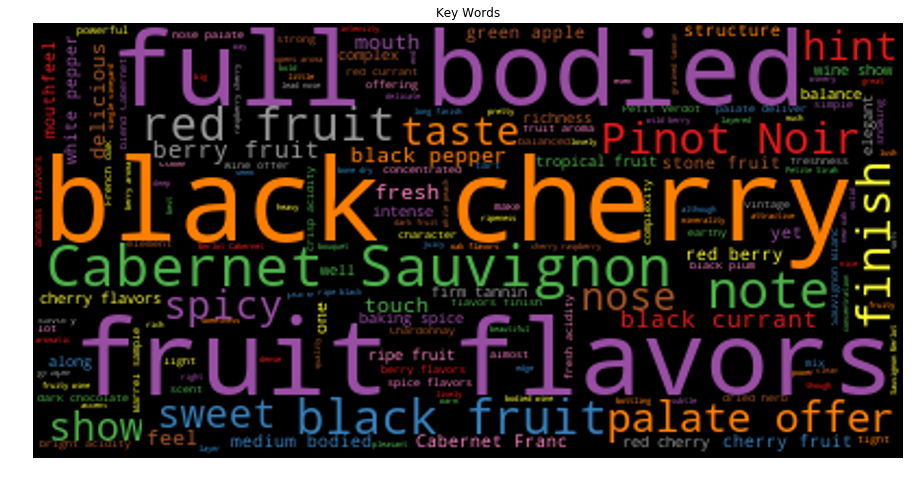

In [39]:
#shows keywords in description column use wordcloud function 
plt.figure(figsize=(16,8))
plt.title('Key Words')
stopwords=set(STOPWORDS)
stopwords.update(["drink", "now", "flavor"]) #update stop words
wc = WordCloud(stopwords=stopwords, background_color="black", colormap='Set1').generate(''.join(wine_rev['description']))
plt.imshow(wc,interpolation="catrom")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

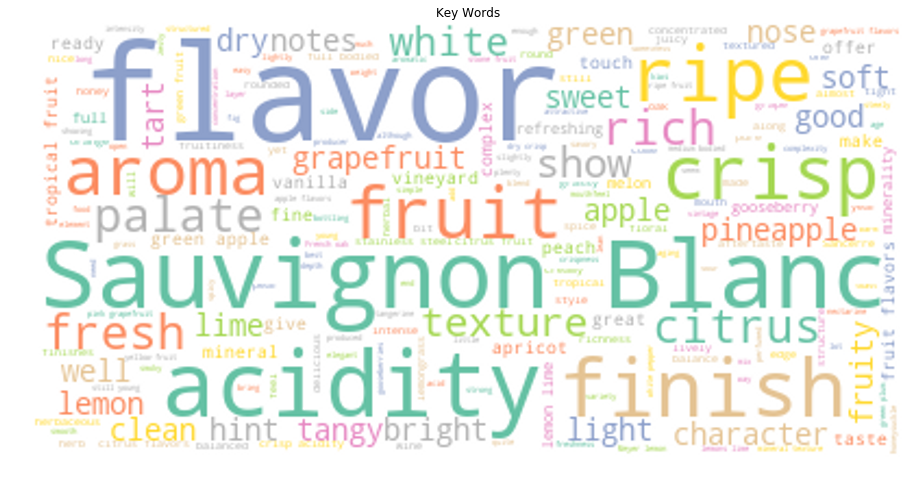

In [40]:
#shows keywords that describes Sauvignon Blanc 
plt.figure(figsize=(16,8))
plt.title('Key Words')
stopwords=set(STOPWORDS)
stopwords.update(["drink", "now", "flavor", "sample", "note", "wine show","wine"]) #update stopwords


wc = WordCloud(stopwords=stopwords, background_color="white", colormap='Set2').generate(''.join(wine_rev[wine_rev['variety'] =='Sauvignon Blanc']['description']))
plt.imshow(wc,interpolation="catrom")
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

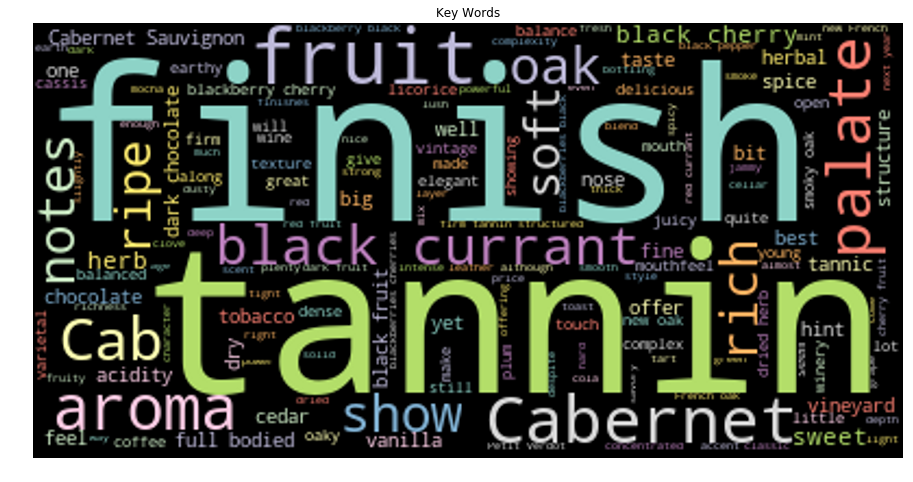

In [41]:
#shows keywords that describes Cabernet Sauvignon 
plt.figure(figsize=(16,8))
plt.title('Key Words')
stopwords=set(STOPWORDS)
stopwords.update(["drink", "now", "flavor", "sample", "note", "wine show","wine","flavors","de","cuv","good"]) #update stopwords


wc = WordCloud(stopwords=stopwords, background_color="black", colormap='Set3').generate(''.join(wine_rev[wine_rev['variety'] =='Cabernet Sauvignon']['description']))
plt.imshow(wc,interpolation="catrom")
plt.axis('off')


       taster_name taster_twitter_handle
count        51009                 51009
unique          14                    14
top     Roger Voss            @vossroger
freq         10926                 10926


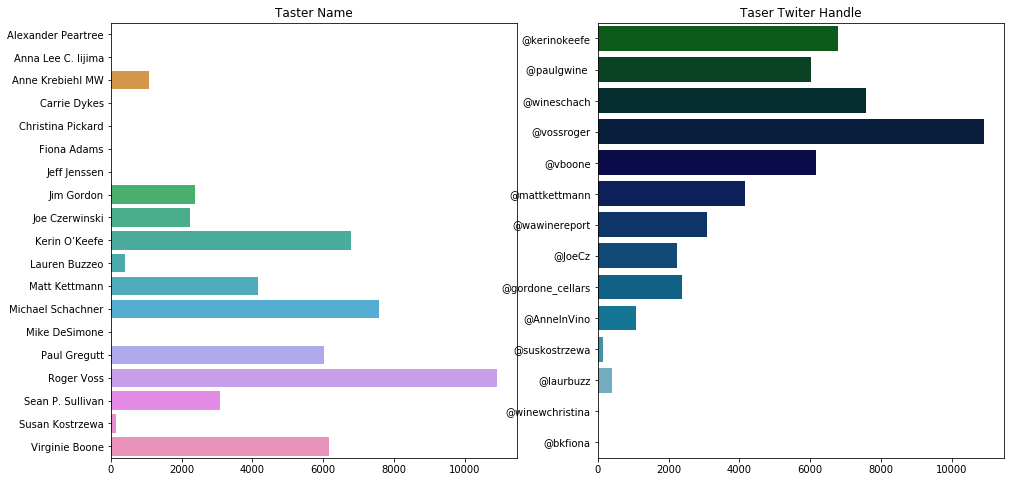

In [42]:
# Display the number of times each reviewer appeares a reviewer is in the twitter Data 
print(twitter[['taster_name','taster_twitter_handle']].describe())
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sb.countplot(y = twitter['taster_name'], ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sb.countplot(y = twitter['taster_twitter_handle'], palette = 'ocean', ax =ax2)
ax2.set_title('Taser Twiter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

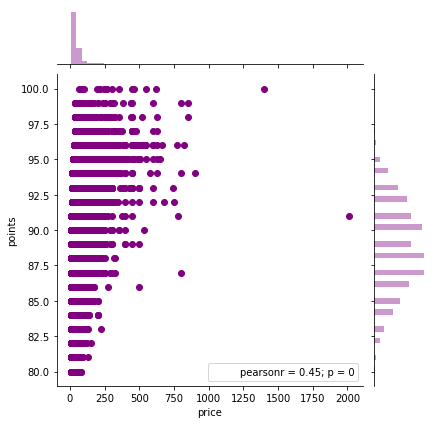

In [43]:
#Display the correlation between pice and points (quality of wine) in wine_rev data
sb.jointplot( x = wine_rev['price'],y = wine_rev['points'],color='purple');

In [45]:
# Remove price outliers above 250$
wine_rev=wine_rev[wine_rev['price']<=250]

In [46]:
wine_rev['p_ranking'] = pd.qcut(wine_rev['price'], q=3, labels=['low', 'medium', 'high'])
wine_rev[wine_rev['p_ranking']=='low'].describe()
# Add a ranking columns to the data (low,Medium,High)
#low=4-24$

,points,price,country_code,province_code,region_1_code,variety_code,winery_code
count,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000
mean,86.665030,16.693036,30.444196,227.796458,661.412827,418.995298,9804.697351
std,2.485991,4.287219,16.222336,157.070931,391.941916,211.340734,5622.452801
min,80.000000,4.000000,1.000000,12.000000,0.000000,0.000000,1.000000
25%,85.000000,13.000000,16.000000,53.000000,306.000000,222.000000,5206.750000
50%,87.000000,17.000000,42.000000,243.000000,686.000000,510.000000,10132.000000
75%,88.000000,20.000000,46.000000,377.000000,1001.000000,553.000000,14500.000000
max,95.000000,24.000000,46.000000,480.000000,1331.000000,753.000000,19183.000000


In [47]:
wine_rev[wine_rev['p_ranking']=='medium'].describe()
#medium=25-38.5$

,points,price,country_code,province_code,region_1_code,variety_code,winery_code
count,30852.000000,30852.000000,30852.000000,30852.000000,30852.000000,30852.000000,30852.000000
mean,88.694801,32.680472,32.463633,201.235544,683.670945,377.444477,9612.500032
std,2.772887,5.006606,14.575413,169.154436,403.181745,222.296560,5475.352453
min,80.000000,25.000000,1.000000,12.000000,0.000000,2.000000,2.000000
25%,87.000000,28.000000,16.000000,53.000000,306.000000,132.000000,4906.500000
50%,89.000000,33.000000,42.000000,70.000000,792.000000,476.000000,9750.000000
75%,91.000000,38.524329,46.000000,377.000000,1033.000000,544.000000,14109.000000
max,99.000000,39.000000,46.000000,480.000000,1330.000000,753.000000,19184.000000


In [48]:
wine_rev[wine_rev['p_ranking']=='high'].describe()
#high=39-250$

,points,price,country_code,province_code,region_1_code,variety_code,winery_code
count,32139.000000,32139.000000,32139.000000,32139.000000,32139.000000,32139.000000,32139.000000
mean,90.648558,65.275180,35.182302,184.200535,676.598494,359.922835,10130.014811
std,2.802830,30.489088,14.263554,162.262624,416.921565,205.922065,5551.515208
min,80.000000,40.000000,1.000000,12.000000,0.000000,0.000000,8.000000
25%,89.000000,45.000000,23.000000,53.000000,218.000000,132.000000,6141.000000
50%,91.000000,55.000000,46.000000,53.000000,801.000000,476.000000,10550.000000
75%,93.000000,75.000000,46.000000,325.000000,1039.000000,510.000000,15024.000000
max,100.000000,250.000000,46.000000,480.000000,1330.000000,751.000000,19183.000000


In [49]:
len (wine_rev[wine_rev['price']>=200])

304

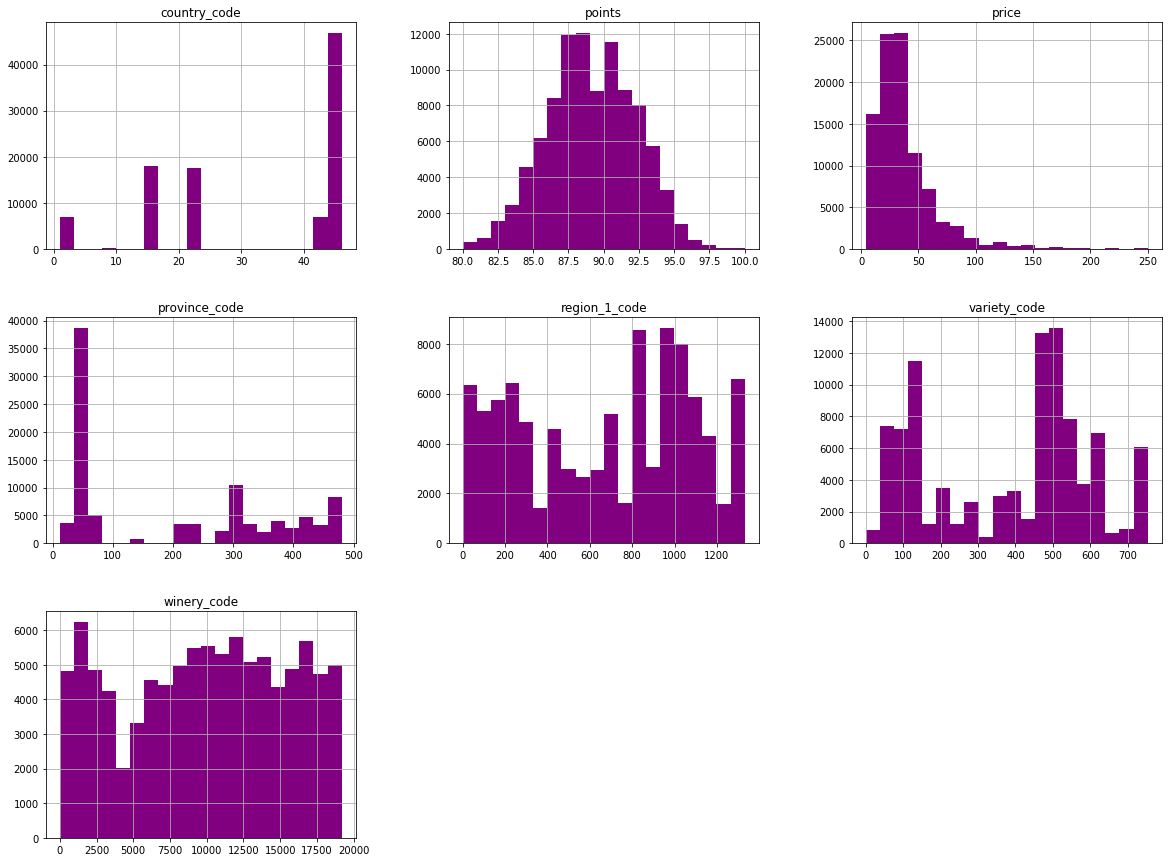

In [50]:
# Display the categorial variables as histograms after data preperation
wine_rev.hist(bins = 20, figsize = (20,15), color ='purple') 
plt.show()

In [52]:
wine_rev.head()

,country,description,designation,points,price,province,region_1,variety,winery,country_code,province_code,region_1_code,variety_code,winery_code,p_ranking
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,46,53,801,84,9617,high
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,42,296,1156,655,1596,high
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,46,53,576,553,11865,high
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,46,305,1318,476,14377,high
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,16,340,71,499,7198,high


In [62]:
wine_rev.to_csv ("wine_rev.csv")

In [63]:
wine_rev = pd.read_csv ("wine_rev.csv")

In [64]:
# Remove all wines that appears under 2000 times in the dataset and display them in a plot 
count=wine_rev.groupby(['variety_code']).size().reset_index(name='variety_count')
wine_rev=wine_rev.merge(count, how='left')# ,on='Unnamed:0')

In [65]:
count_1500=wine_rev[ wine_rev['variety_count'] >2000]
wine_rev=count_1500 

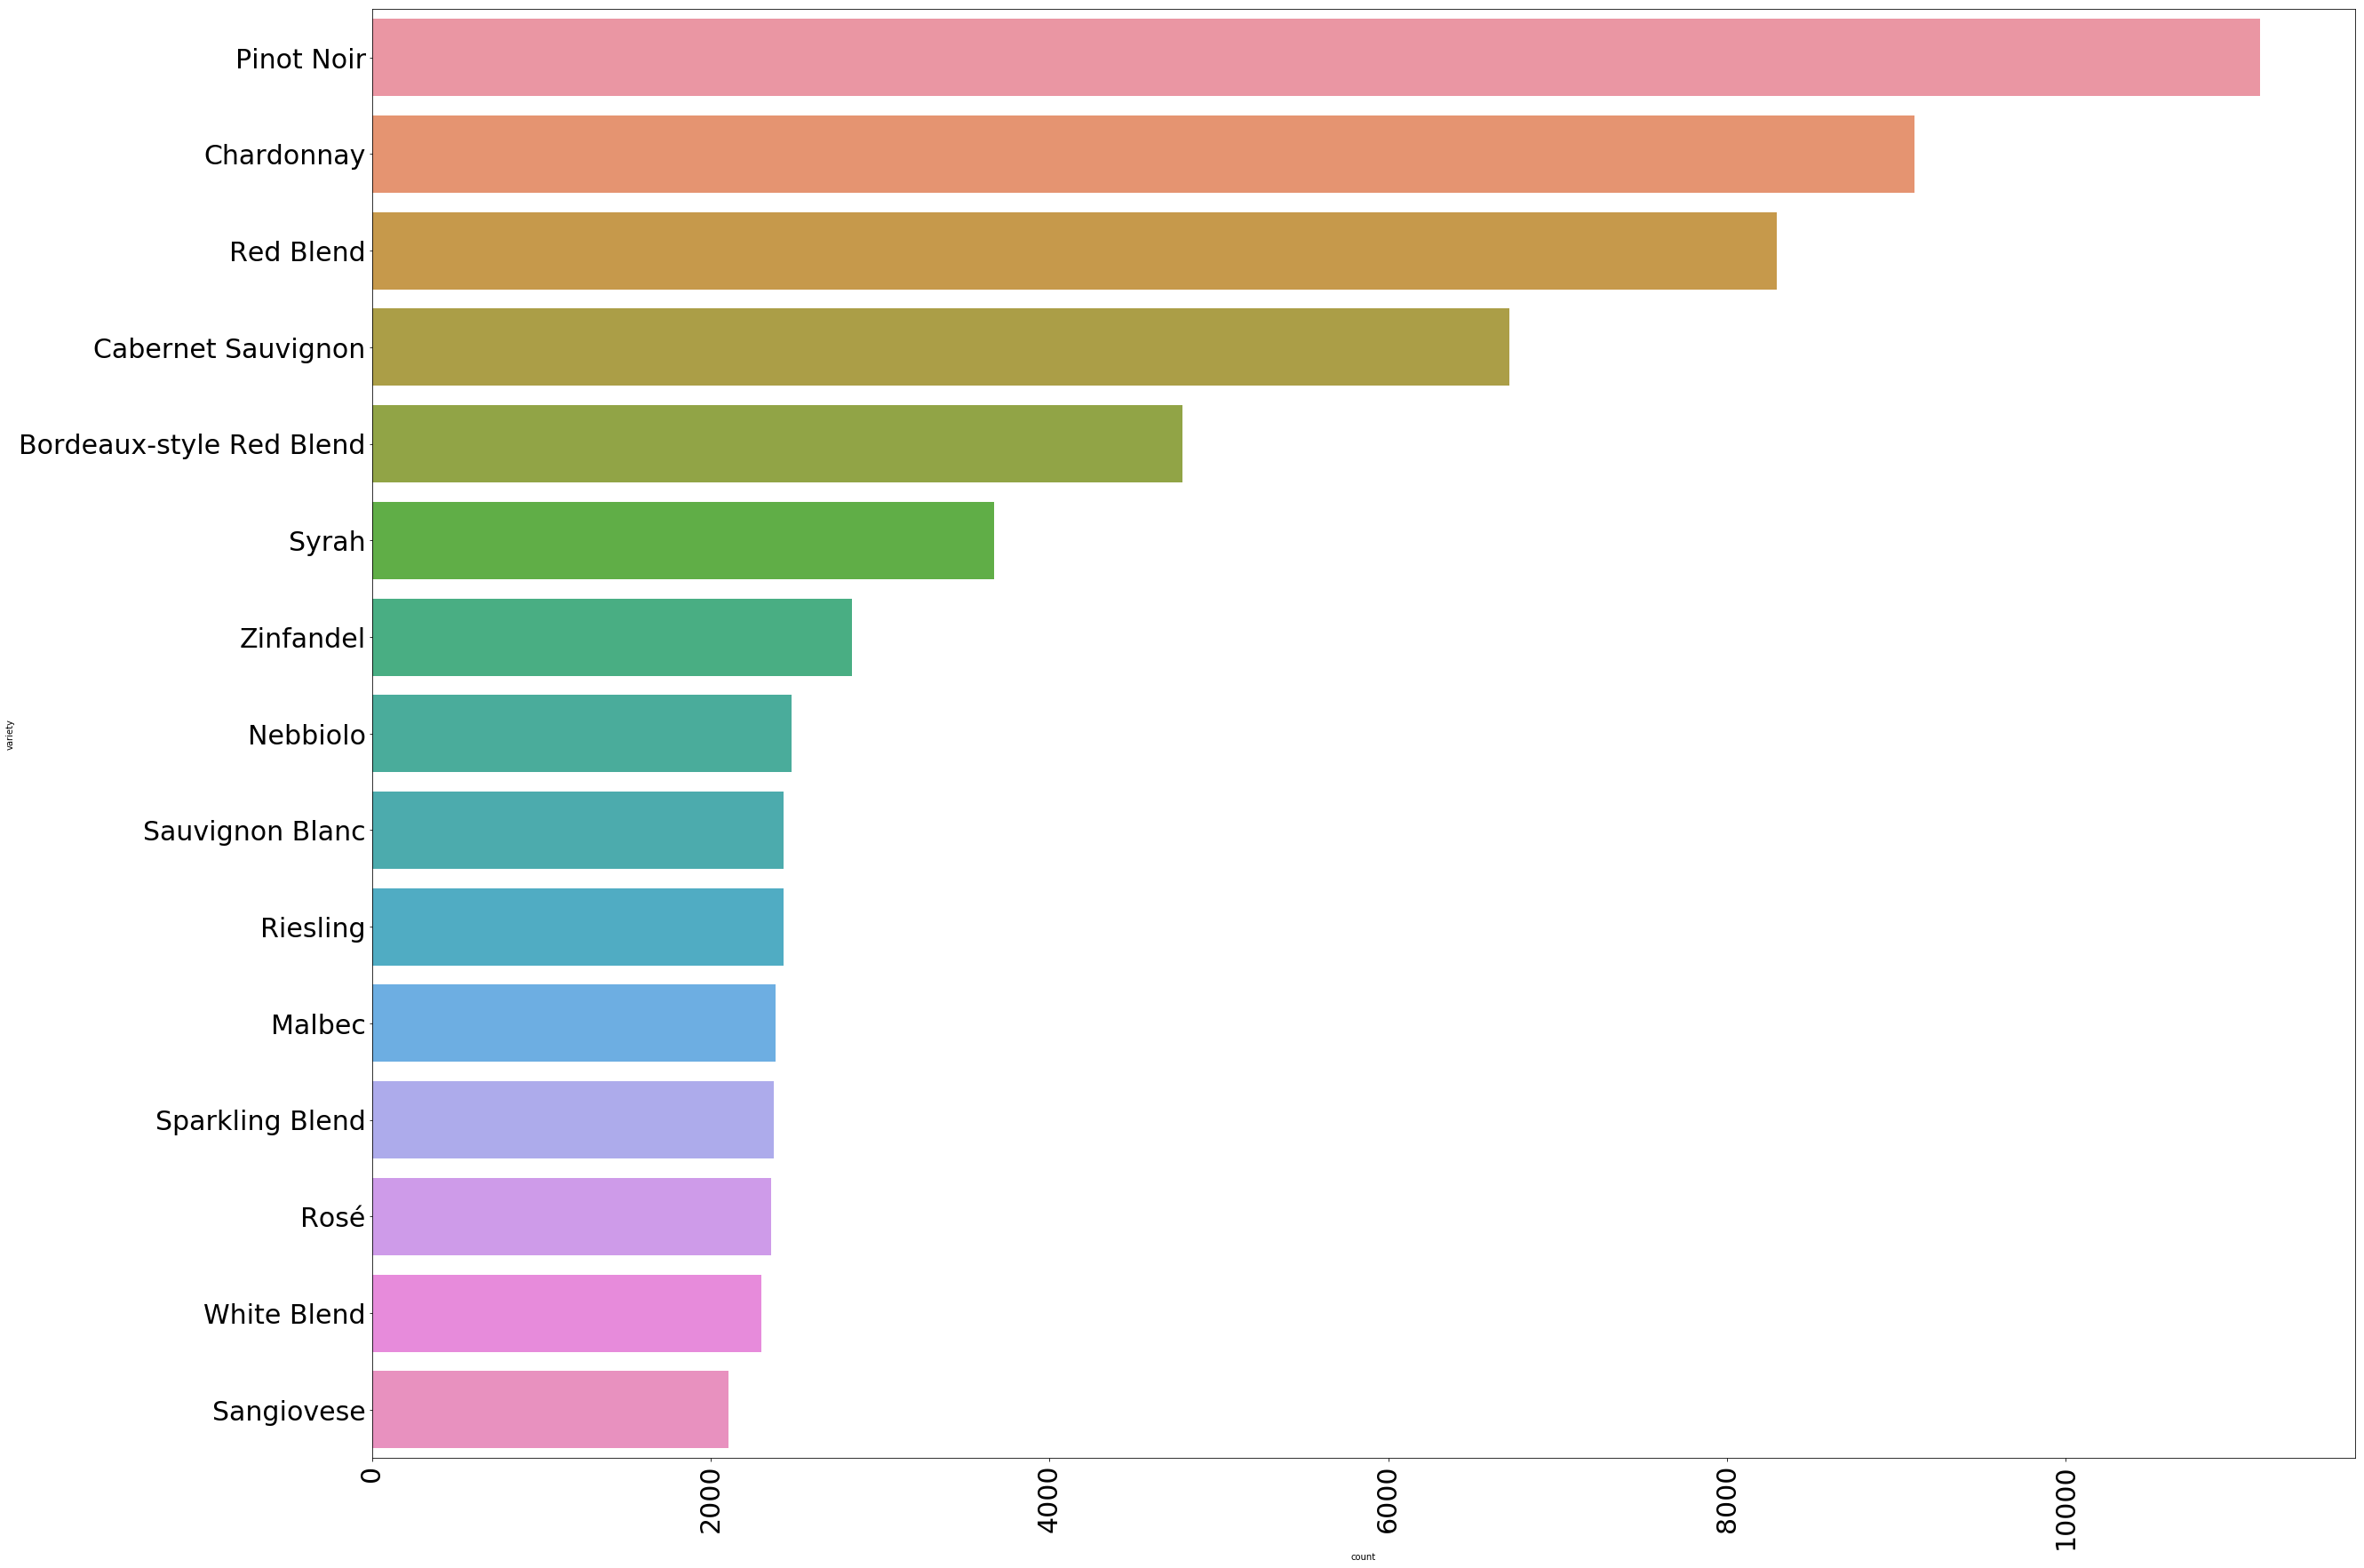

In [142]:
fig, ax = plt.subplots(figsize = (40, 30))
sb.countplot(y = wine_rev['variety'],  ax = ax,order=wine_rev['variety'].value_counts().index) # order = varieties,
plt.xticks(rotation = 90,fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Modeling

### NLP Preperation  & NLP 

In [67]:
#Turn all text in description into a lower case text
wine_rev['description']=wine_rev.description.str.lower() 

In [68]:
# Use replace method to replace charaters with space
wine_rev.description = wine_rev.description.str.replace( '[^a-z]', ' ')

In [69]:
wine_rev['description'].head()

0    this tremendous      varietal wine hails from ...
2    mac watson honors the memory of a wine once ma...
3    this spent    months in     new french oak  an...
8    this re named vineyard was formerly bottled as...
9    the producer sources from two blocks of the vi...
Name: description, dtype: object

#### Create Bag of Words using TfidfVectorizer 

In [70]:
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [71]:
wine_bag = vectorizer.fit_transform(wine_rev['description'])

In [72]:
wine_bag.shape

(65418, 24054)

In [73]:
# Display a sample from the bag of words
words = vectorizer.get_feature_names()
words[550:575]

['ally',
 'allying',
 'alma',
 'almaterra',
 'almerita',
 'almond',
 'almondine',
 'almonds',
 'almondskin',
 'almondy',
 'almost',
 'aloft',
 'alois',
 'alone',
 'along',
 'alongside',
 'alonside',
 'aloof',
 'aloxe',
 'alperegis',
 'alpes',
 'alpha',
 'alphonse',
 'alphonses',
 'alpilles']

In [74]:
# Limit the size of bag of words to 3000
vectorizer1 = TfidfVectorizer(stop_words = stopwords, max_features = 3000)
wine_bag1 = vectorizer1.fit_transform(wine_rev['description'])
words1 = vectorizer1.get_feature_names()

In [75]:
# Display a sample from the new bag of words
words1[558:570]

['comprise',
 'comprised',
 'concentrated',
 'concentration',
 'concrete',
 'confected',
 'confectionary',
 'considerable',
 'considerably',
 'considered',
 'considering',
 'consistency']

# Clustering 

### Kmeans 

In [80]:
# Please note that runnig the loop for the elbow diagram did't succeed
# Define the number of clusters randomly to 15
kmeans = KMeans(n_clusters = 15)
kmeans.fit(wine_bag1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
# Display the results of common words for each cluster
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words1[word] for word in centroid))

0 : citrus, white, peach, lemon, palate, finish, dry, aromas, lime, acidity
1 : berry, aromas, finish, plum, palate, herbal, blackberry, malbec, notes, black
2 : pinot, noir, cola, cherry, silky, dry, raspberry, cherries, acidity, rich
3 : tannins, wood, barrel, fruits, fruit, firm, ripe, dense, black, acidity
4 : apple, palate, pear, lemon, green, finish, aromas, citrus, acidity, fresh
5 : cabernet, sauvignon, merlot, blend, franc, verdot, petit, black, fruit, syrah
6 : fruity, acidity, attractive, light, crisp, fresh, red, soft, ready, fruits
7 : blackberries, cherries, currants, raspberries, dry, tannins, oak, sweet, rich, black
8 : chardonnay, pineapple, buttered, oak, vanilla, toast, acidity, tropical, rich, fruit
9 : palate, tannins, alongside, black, aromas, cherry, offers, berry, licorice, spice
10 : bodied, full, medium, fruit, texture, finish, cherry, ripe, black, aromas
11 : blackberry, cherry, dry, sweet, tannins, currant, soft, rich, alcohol, chocolate
12 : nose, black, pa

In [82]:
# Add a column to the data that represent the cluster for each row
wine_rev['cluster'] = kmeans.labels_

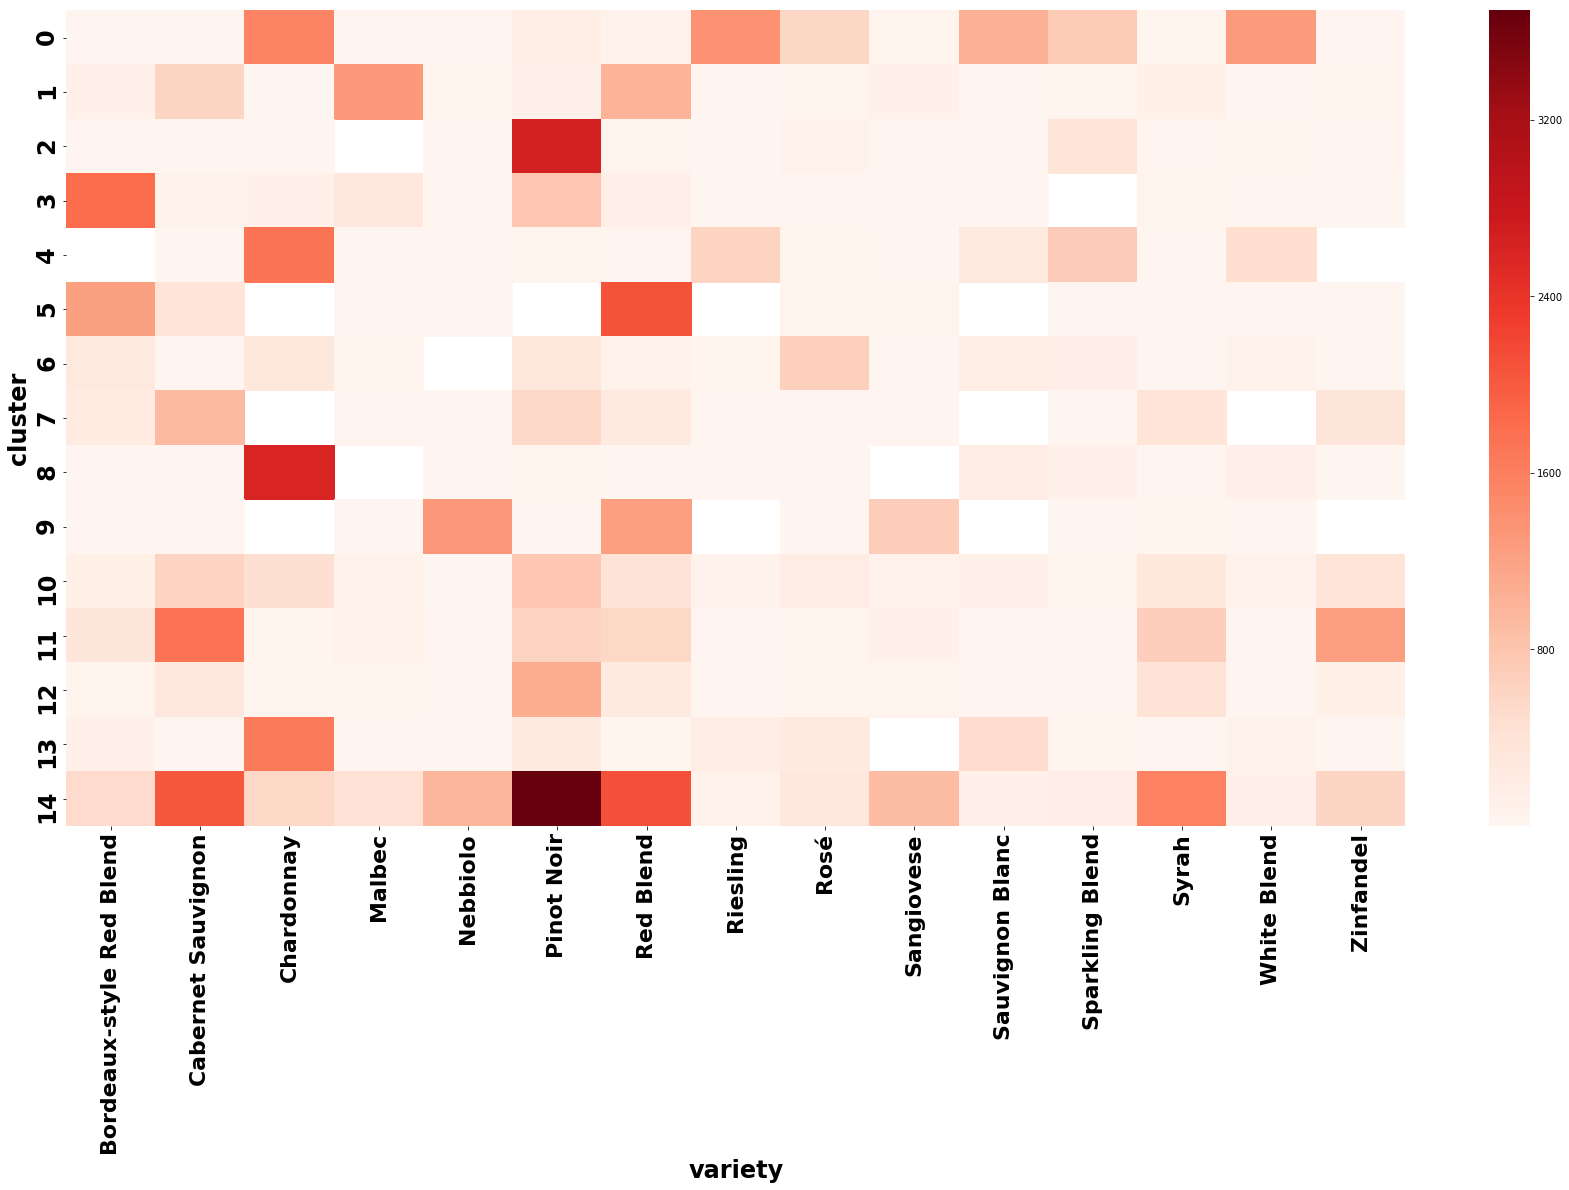

In [150]:
# Display Heatmap with the correlation between the clusters and variety
clusters = wine_rev.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(22)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(24)
    label.set_weight("bold")

In [84]:
# Define the number of clusters randomly to 40
kmeans1 = KMeans(n_clusters = 40)
kmeans1.fit(wine_bag1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
# Display the results of common words for each cluster
common_words1 = kmeans1.cluster_centers_.argsort()[:,-1:-11:-1]
for num1, centroid1 in enumerate(common_words1):
    print(str(num1) + ' : ' + ', '.join(words1[word] for word in centroid1))

0 : berry, cherry, palate, tannins, red, crushed, aromas, alongside, raspberry, herb
1 : sweet, cherry, soft, fruit, vanilla, finish, raspberry, little, ripe, oak
2 : pinot, noir, cherry, silky, cola, raspberry, dry, acidity, rich, fruit
3 : fruit, finish, cherry, vineyard, palate, tannins, red, acidity, tart, notes
4 : blanc, sauvignon, blend, citrus, crisp, acidity, chardonnay, white, green, dry
5 : oak, espresso, coffee, astringent, palate, aromas, tannins, alongside, bean, toasted
6 : cabernet, sauvignon, merlot, blend, franc, syrah, fruit, cherry, tannins, red
7 : black, cherry, fruit, pepper, tannins, finish, dark, aromas, palate, tea
8 : lemon, lime, palate, nose, acidity, apple, finish, grapefruit, dry, fresh
9 : attractive, acidity, fruity, fruits, soft, red, fresh, ready, crisp, ripe
10 : years, next, tannins, cherry, cellar, develop, age, six, fruit, will
11 : wood, aging, fruit, fruits, ripe, rich, acidity, tannins, character, spice
12 : alcohol, high, hot, zin, heat, choco

In [86]:
# Add a column to the data that represent the cluster for each row
wine_rev['cluster1'] = kmeans1.labels_

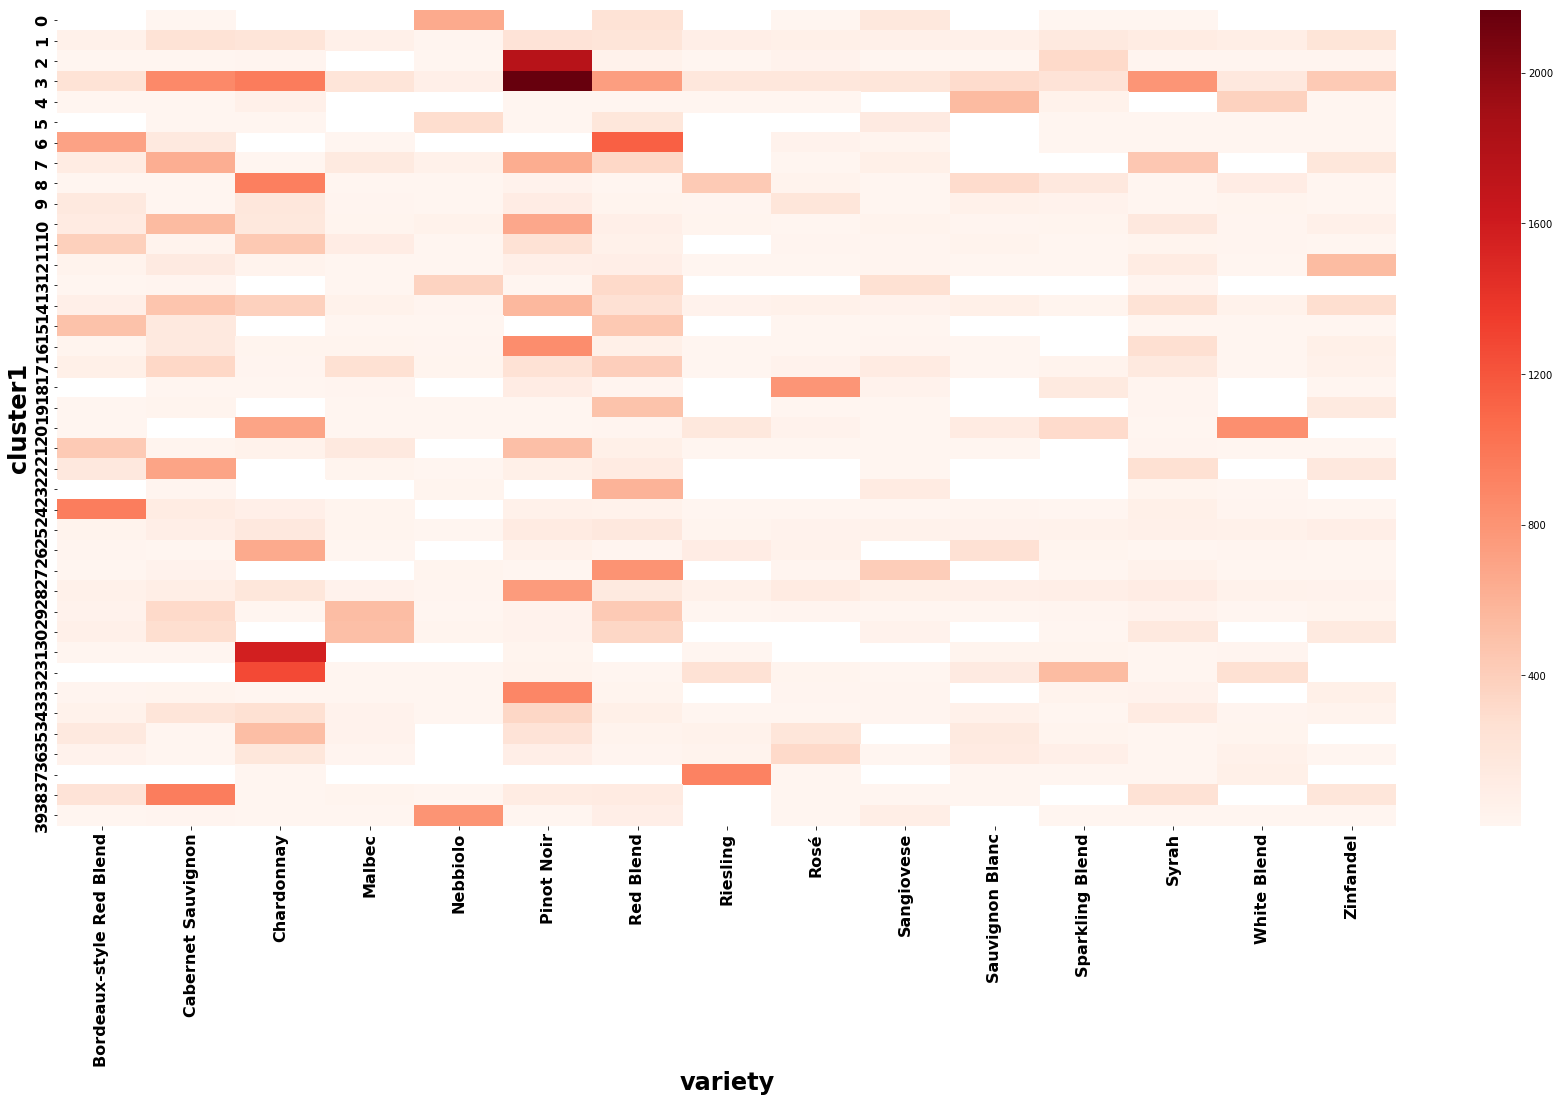

In [87]:
# Display Heatmap with the correlation between the clusters and variety
clusters1 = wine_rev.groupby(['cluster1', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters1.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster1', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [88]:
labels = wine_rev.variety_code
labels.unique()

array([ 84, 553, 476, 132, 529, 604, 544, 595, 510, 516, 299, 411, 751,
       739,  64], dtype=int64)

In [94]:
#function to determine the cluster to which the description belongs by calculating the shortest distance between the user description vector to the cluster centroids
def dec_vec():
    dist_arr = np.array([])
    s=str(input("please enter your favorite taste:"))
    s=s.lower()
    s=s.replace( '[^a-z]', ' ')
    input_list=[s]
    new_vec=vectorizer1.transform(input_list)
    for j in range(len(kmeans1.cluster_centers_)):
        dist = np.linalg.norm(kmeans1.cluster_centers_[j]-new_vec)
        dist_arr = np.append(dist_arr,dist)
    return dist_arr.argmin()

In [95]:
x=dec_vec()

please enter your favorite taste:fruity


In [96]:
#determines which variety is the most common in the relevant cluster
wine_rev_clus = wine_rev.loc[wine_rev['cluster1']==x]
variety_des = wine_rev_clus.variety.mode()

In [97]:
#creates a new df "wine_var_count" that has the frequency of each variety in the chosen cluster
wine_var_count = pd.DataFrame()
wine_var_count ['name'] = wine_rev_clus['variety'].value_counts().index.tolist()
wine_var_count ['freq'] = wine_rev_clus['variety'].value_counts().values.tolist()

In [ ]:
#creates a new df "wine_rev_count" that has the frequency of each variety in the entire dataset
wine_rev_count = pd.DataFrame()
wine_rev_count ['name'] = wine_rev['variety'].value_counts().index.tolist()
wine_rev_count ['freq'] = wine_rev['variety'].value_counts().values.tolist()

In [ ]:
#merges the two dfs, showing frequency of each variety both in cluster and in the entire dataset 
#then counts the ratio between the frequencies in order to neutralize the effect of the variety commonness in the dataset

df3 = wine_var_count.merge(wine_rev_count,on='name',how='outer')
df3=df3.dropna(axis=0,subset=['freq_x'])
df3['total']= df3['freq_x']/df3['freq_y']

In [100]:
#finds the variety that has the maximum ratio in the above df
variety_rec = df3['name'].loc[df3['total'].idxmax()]
#variety_rec

In [101]:
#function to recieve user input on the desired price range
def wine_desig():
    desig=str
    desig=str(input("what's your preferd price range? Low\medium\high: "))
    return desig

In [102]:
print(x)
user_price = wine_desig()

36
what's your preferd price range? Low\medium\high: high


In [103]:
#in the relevant variety filters and chooses the wine designations according to price preferences and wine review ranking
filtered_wine = pd.DataFrame()
filtered_wine= wine_rev_clus.query('variety==@variety_rec and p_ranking==@user_price')
filtered_wine= filtered_wine[filtered_wine['points']== filtered_wine['points'].max()]
filtered_wine.drop_duplicates(subset=['designation'],keep='first',inplace=True)
designation=filtered_wine['designation']
winery=filtered_wine['winery']
print ('here is your recommended variety:',variety_rec)
print ('here are your recommended wines:',designation.values)

here is your recommended variety: Rosé
here are your recommended wines: ['Clos Capelune' 'Rose et Or']


### Random Forest

In [109]:
from sklearn.model_selection import GridSearchCV

param_n_estimators_range = [10, 20, 40, 80, 160] # מספר העצים
param_max_depth_range =  [3, 4, 5, 6] # עומק עץ

param_grid = [{'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range},
              {'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range, 'bootstrap': ['False']}]

#### Grid Search  

In [110]:
from sklearn.ensemble import RandomForestRegressor 

gs = GridSearchCV (estimator=RandomForestRegressor(), param_grid = param_grid, cv=4)

In [111]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(wine_bag1, labels, wine_rev.index, test_size=0.5, random_state=0)
gs = gs.fit (X=X_train, y=y_train.ravel())

In [112]:
print ('The best score is:', gs.best_score_, '\nThe best parameters are:', gs.best_params_)

The best score is: 0.25537812145121114 
The best parameters are: {'bootstrap': 'False', 'max_depth': 6, 'n_estimators': 40}


In [113]:
gs1 = GridSearchCV (estimator=RandomForestRegressor(), param_grid = param_grid, cv=4)
gs1 = gs1.fit (X=wine_bag1, y=labels.ravel())

In [114]:
print ('The best score is:', gs1.best_score_, '\nThe best parameters are:', gs1.best_params_)

The best score is: 0.2512690049298037 
The best parameters are: {'max_depth': 6, 'n_estimators': 40}


In [115]:
# Check precision and recall for each variety
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(wine_bag1, labels, wine_rev.index, test_size=0.5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=wine_rev['variety'].unique()))

                          precision    recall  f1-score   support

      Cabernet Sauvignon       0.97      0.02      0.05      2380
         Sauvignon Blanc       0.68      0.12      0.20      3355
              Pinot Noir       0.52      0.86      0.65      4543
              Chardonnay       0.00      0.00      0.00      1192
                    Rosé       0.98      0.20      0.33      1224
                   Syrah       0.29      0.98      0.44      5576
              Sangiovese       0.47      0.59      0.52      4123
         Sparkling Blend       0.00      0.00      0.00      1254
               Red Blend       0.96      0.05      0.09      1207
                Riesling       0.00      0.00      0.00      1070
                  Malbec       0.88      0.04      0.08      1207
                Nebbiolo       1.00      0.02      0.03      1161
               Zinfandel       0.00      0.00      0.00      1800
             White Blend       1.00      0.01      0.02      1142
Bordeaux-

C:\Users\omers\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
from sklearn.metrics import accuracy_score, f1_score
print("Random forests:", accuracy_score(y_test, y_pred))

Random forests: 0.38769146106576174


#### Confusion Metrix

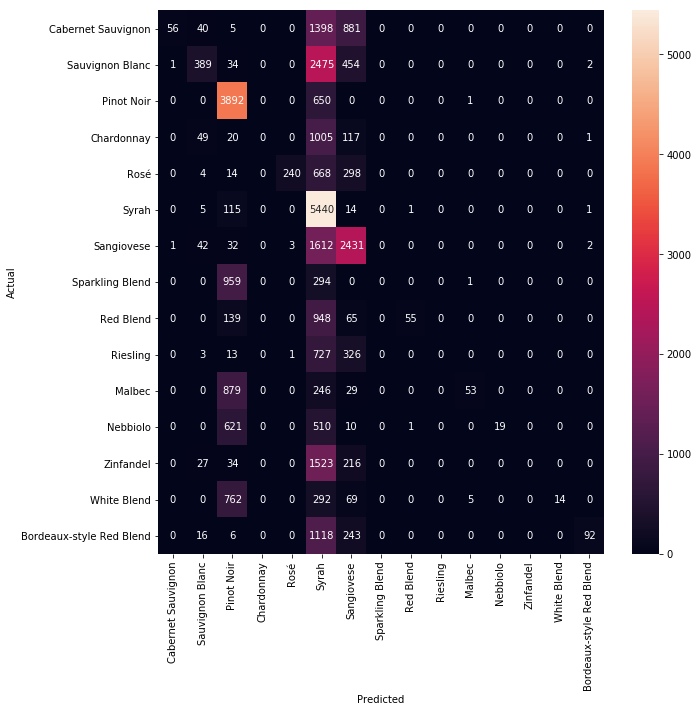

In [117]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(conf_mat, annot=True, fmt='d',xticklabels=wine_rev['variety'].unique(), yticklabels=wine_rev['variety'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()